# MNIST Digit Recognizer

In [ ]:


import numpy as np
import pandas as pd 
import time
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator
from sklearn.linear_model import LogisticRegression

from keras.datasets import mnist
pd.options.display.max_columns = 30
pd.options.display.max_rows= 30

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Aufteilen in Trainings und Testdatensatz 

In [2]:
x_train=x_train[0:5000,:,:]
x_test=x_test[0:1000,:,:]

x_train = x_train.reshape(x_train.shape[0], 28, 28)
print('X_train shape:   ',x_train.shape)

x_test = x_test.reshape(x_test.shape[0], 28, 28)
print('X_test shape:    ',x_test.shape)


y_test=y_test[0:1000]

y_train=y_train[0:5000]

#3 dimensionale Arrays

X_train shape:    (5000, 28, 28)
X_test shape:     (1000, 28, 28)



## Plot der eingelesenen Bilder

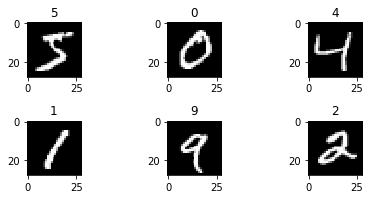

In [3]:
for i in range(0, 6):
    plt.subplot(330 + (i+1))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])
    plt.tight_layout()
    
    #28 spalten und 28 zahlen -> 784

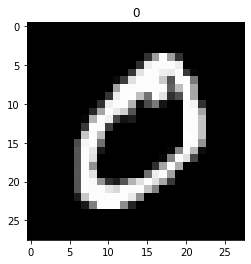

In [4]:
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.title(y_train[1]);

## Bilder in Matrizen

In [5]:
pd.DataFrame(x_train[1,:,:].reshape(28,28))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0


In [6]:
# Farben standardisieren
mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [7]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

# wie viele klassen habe ich-> wie viele output neuronen -> 10 -> jeder neuron hat Wahr.

10

In [8]:
#### Neural Network
from keras import regularizers
#Learningrate
LR=0.001
# Number of neurons
Neuron_Out=10
Neuron_Hidden=2048
Neuron_Hidden_2=int(Neuron_Hidden/2)

#The Activation function
Activate_output='softmax' # für multinomialverteilung ich transofrmiere meine Gewicht damit jede eine Wahr.***
Activate_hidden='relu'
#The Optimizer
Optimizer= Adam(lr=LR)
# The loss function
loss='categorical_crossentropy'  # ist nicht als negative log likelihood von multinomiale -> ziel ist zu minimieren


## Neural Network
#Initialize the ANN
model_ANN= Sequential()
#Input conversion
model_ANN.add(Lambda(standardize,input_shape=(28,28))) # alle zahlen zu standardisieren
model_ANN.add(Flatten())    # zweite ist wichtiger 

# Hidden Layer
model_ANN.add(Dense(Neuron_Hidden, activation=Activate_hidden, use_bias=True,
                    kernel_regularizer=regularizers.l1(0.01)))    # ich habe in hidden layer regualrizierung reingenommen

#Output Layer
model_ANN.add(Dense(Neuron_Out, activation=Activate_output,use_bias=True))
model_ANN.summary()
model_ANN.compile(optimizer=Optimizer , loss=loss,metrics=['accuracy'])

#Fit the model
history_ANN=model_ANN.fit(
x_train, # training data
y_train, # training targets
epochs=15,verbose=1, batch_size=512)   # 15 epochen , batch_size bedeutet ich teile meine daten auf 512 forward and backward propagation

# look at number of parameter and dont forget the number of biases

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
5000/5000 [==============================] - 3s 613us/step - loss: 311.2205 - acc: 0.5710
Epoch 2/15
5000/5000 [=====================

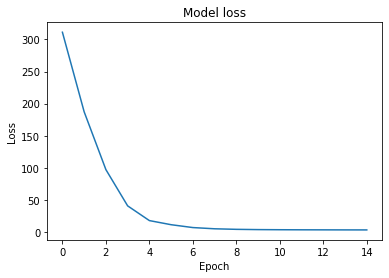

In [9]:
plt.plot(history_ANN.history['loss'])
#plt.plot(history_ANN.history['val_acc'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
y_pred_ANN=model_ANN.predict_classes(x_test)
y_score_ANN= model_ANN.predict(x_test)

In [11]:
Accuracy_ANN=accuracy_score(y_test,y_pred_ANN)
Accuracy_ANN

# ist in sample schon weniger , erste indekation dass man overfitting hat

0.803

In [12]:
print(x_train.shape)
y_train_MNLogit=pd.DataFrame(y_train).idxmax(axis=1)     #klausur frage: multinomiale modell weil ordinal macht kein sinn hier.
x_train_MLogit = x_train.reshape((x_train.shape[0], -1))
x_train_MLogit.shape
print(y_train_MNLogit.shape)

# 

(5000, 28, 28)
(5000,)


## Vergleich mit multinomialen Logit Modell

In [37]:
# Turn up tolerance for faster convergence

t0=time.time()
clf = LogisticRegression(
    C=0.01 , penalty='l1', solver='saga', tol=0.05, multi_class='multinomial'
) # je größer c desto stärker meine regualrizierung?
clf.fit(x_train_MLogit, y_train_MNLogit)


x_test_MNLogit = x_test.reshape((x_test.shape[0], -1))

sparsity = np.mean(clf.coef_ == 0) * 100
Accuracy_MNLogit = clf.score(x_test_MNLogit, y_test)
# print('Best C % .4f' % clf.C_)
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % Accuracy_MNLogit )



Example run in 18.562 s
Sparsity with L1 penalty: 40.71%
Test score with L1 penalty: 0.8870


## Plot der Koeffizienten

Text(0.5, 0.98, 'Classification vector for...')

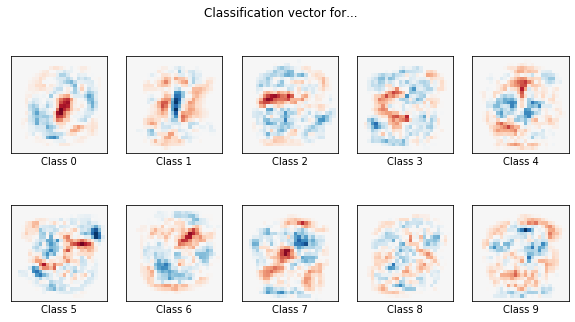

In [38]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

# blau punkt wichtig zu entscheiden welcher Ziffer ist!
#

## Koeffizientenmatrix

In [39]:
pd.options.display.max_columns = 3000
pd.options.display.max_rows= 3000
pd.DataFrame(clf.coef_).T

,0,1,2,3,4,5,6,7,8,9
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
